<center><H1>An Introduction to the Python-ARM Radar Toolkit</H1></center>

The Python ARM Radar Toolkit, Py-ART, is a Python module containing a collection of weather radar algorithms and utilities. Py-ART is partly funded by and used by the Atmospheric Radiation Measurement (ARM) Climate Research Facility for working with data from a number of its precipitation and cloud radars, but has been designed so that it can be used by others in the radar and atmospheric communities to examine, processes, and analyze data from many types of weather radars.

In [2]:
#first, import Py-ART
import pyart


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [15]:
#and some other things we need
from matplotlib import pyplot as plt
import os
from netCDF4 import num2date
#and set images to appear inline
%matplotlib inline

Py-ART has several modules
-------------------------
1) io: io operations

2) Correct: corrections in antenna coordinates

3) Retrieve: Retrievals in both antenna and Cartesian Coordinates

4) Map: Mapping/gridding to a cartesian coordinate space

5) Graph: Plotting both radial and Cartesian data

Lets look at an example from the ARM C-Band Scanning ARM Precipitation Radar, C-SAPR

![ARM C-SAPR](images/csapr.jpeg)

In [6]:
#first, get a string with the full pathname 
home_dir = os.path.expanduser('~')
filename = '110635.mdv'
full_file_name = os.path.join(home_dir, filename)

In [8]:
#Read the data into the Py-ART Common Data Model
radar = pyart.io.read(full_file_name)

Py-ART has a data model that looks very similar to CF-Radial. It makes heavy use of dictionaries.. If in doubt, always remember *the data is in 'data'*

In [9]:
#field data is in fields
print(radar.fields.keys())

dict_keys(['differential_reflectivity', 'reflectivity', 'cross_correlation_ratio', 'specific_differential_phase', 'velocity', 'spectrum_width', 'normalized_coherent_power', 'differential_phase'])


In [17]:
#there are several dimensional fields
print('Our radar has ', radar.range['data'].shape, ' gates')
print('Our radar has ', radar.azimuth['data'].shape, ' gates')
print('Units of time is ', radar.time['units'])
print('Collection started at ', num2date(radar.time['data'][0],radar.time['units'] ))
print('Collection ended at ', num2date(radar.time['data'][-1],radar.time['units'] ))


Our radar has  (983,)  gates
Our radar has  (6120,)  gates
Units of time is  seconds since 2011-05-20T11:01:00Z
Collection started at  2011-05-20 11:01:00
Collection ended at  2011-05-20 11:06:35


In [19]:
#Like CF-Radial there is a pseudo-dimension of sweeps
print('Our radar has ', radar.sweep_start_ray_index['data'].shape, ' sweeps')


Our radar has  (17,)  sweeps


In [24]:
#data is collected as two dimensional numpy (often masked) arrays
key = 'reflectivity'
print('dimensionality of ', key, ' is ', radar.fields[key]['data'].shape)
print('with units ', radar.fields[key]['units'])
print('Maximum ', key, ' is ', radar.fields[key]['data'].max())
print('Minimum ', key, ' is ', radar.fields[key]['data'].min())


dimensionality of  reflectivity  is  (6120, 983)
with units  dBZ
Maximum  reflectivity  is  59.86
Minimum  reflectivity  is  -57.17


We could plot the whole radar as a matplotlib pcolormesh.. but this creates a lot of patches.. so lets extract a sweep

In [26]:
radar_sweep = radar.extract_sweeps([0])

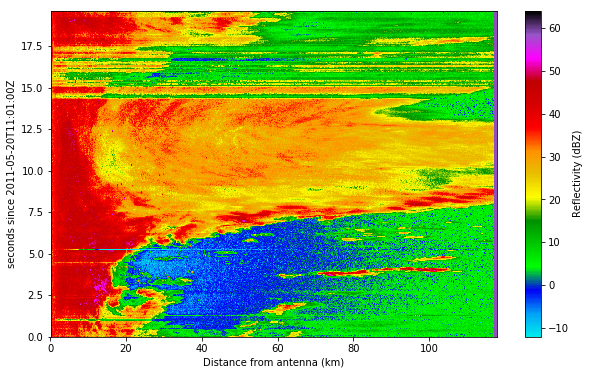

In [37]:
range_array = radar_sweep.range['data']/1000.0
time_array = radar_sweep.time['data']
fig = plt.figure(figsize = [10,6])
plt.pcolormesh(range_array, time_array,
               radar_sweep.fields['reflectivity']['data'],
               cmap = pyart.graph.cm.NWSRef,
               vmin = -12, vmax = 64)
plt.ylabel(radar_sweep.time['units'])
plt.xlabel('Distance from antenna (km)')
plt.colorbar(label = 'Reflectivity (dBZ)')